In [4]:
!pip install scikeras[tensorflow] # уже установлен

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 44.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensions-4.10.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    F

In [ ]:
!pip install mnist

In [ ]:
import numpy as np
import pandas as pd
import mnist
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from scikeras.wrappers import KerasClassifier

### Building model for digit recognition

In [ ]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

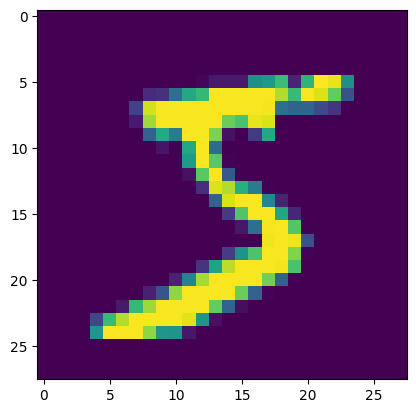

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train_images()[0]/255)
mnist.train_images()[1]/255
to_categorical(train_labels)
#train_labels

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
model_2 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [ ]:
model_2.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 1s 6ms/step - loss: 0.5386 - accuracy: 0.8566
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2349 - accuracy: 0.9324
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1766 - accuracy: 0.9486
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1435 - accuracy: 0.9583
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1209 - accuracy: 0.9646
Epoch 6/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1007 - accuracy: 0.9703
Epoch 7/10
120/120 [==============================] - 1s 8ms/step - loss: 0.0883 - accuracy: 0.9736
Epoch 8/10
120/120 [==============================] - 1s 9ms/step - loss: 0.0771 - accuracy: 0.9773
Epoch 9/10
120/120 [==============================] - 1s 8ms/step - loss: 0.0692 - accuracy: 0.9796
Epoch 10/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0611 - accuracy: 0.9819

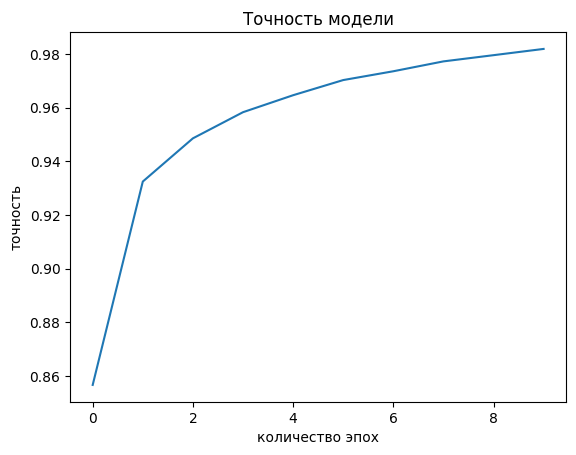

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

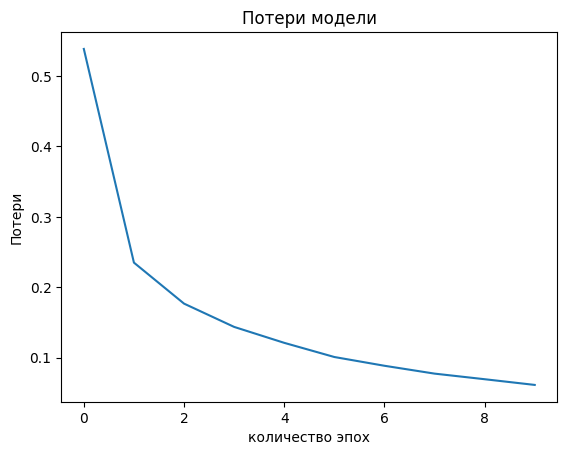

In [ ]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [ ]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0855 - accuracy: 0.9767


[0.08547921478748322, 0.9767000079154968]

In [ ]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0804 - accuracy: 0.9751 - val_loss: 0.1200 - val_accuracy: 0.9642
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0687 - accuracy: 0.9794 - val_loss: 0.1027 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9828 - val_loss: 0.1027 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9847 - val_loss: 0.0914 - val_accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9870 - val_loss: 0.1051 - val_accuracy: 0.9760
CPU times: user 28.3 s, sys: 1.67 s, total: 29.9 s
Wall time: 41.5 s


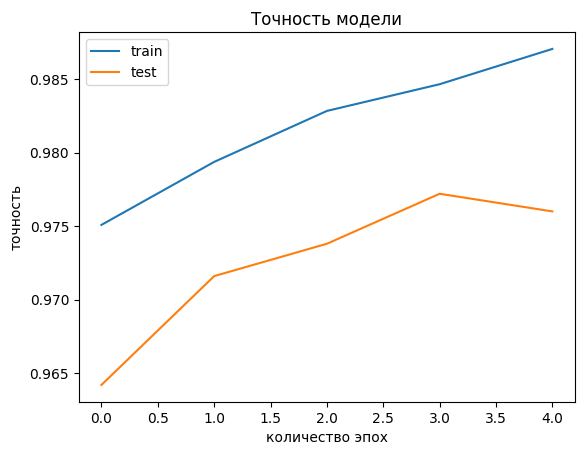

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

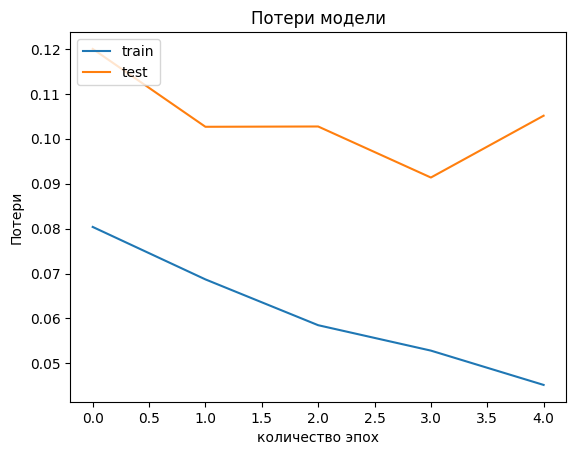

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

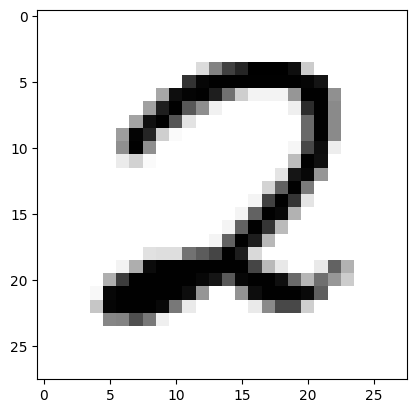

1/1 [==============================] - 0s 76ms/step
1: 2


In [ ]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [2]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [3]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

NameError: name 'Sequential' is not defined

In [ ]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

1/1 [==============================] - 0s 47ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


#ДОМАШНЕЕ ЗАДАНИЕ


In [ ]:
# меняю оптимизатор, добавляю слой с увеличенным числом нейронов

In [ ]:

def my_model(optimizer='RMSprop'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [ ]:
dz_model = my_model()
dz_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
to_categorical(test_labels)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

dz_model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model.
loss,metrics = dz_model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2648 - accuracy: 0.9219 - val_loss: 0.1400 - val_accuracy: 0.9589
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1120 - accuracy: 0.9658 - val_loss: 0.1110 - val_accuracy: 0.9667
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0820 - accuracy: 0.9752 - val_loss: 0.1362 - val_accuracy: 0.9629
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0647 - accuracy: 0.9808 - val_loss: 0.1083 - val_accuracy: 0.9731
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0887 - accuracy: 0.9755
**************
Loss - 0.09, Metrics - 0.975


In [ ]:
model_2 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/3
750/750 [==============================] - 2s 3ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 2/3
750/750 [==============================] - 3s 4ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 0.0438 - val_accuracy: 0.9861
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9781
**************
Loss - 0.08, Metrics - 0.978


In [ ]:
model_3 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=7, batch_size=128, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 2/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0158 - accuracy: 0.9965 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 3/7
375/375 [==============================] - 2s 4ms/step - loss: 0.0143 - accuracy: 0.9966 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 4/7
375/375 [==============================] - 2s 4ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 5/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 6/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0110 - accuracy: 0.9974 - val_loss: 0.0490 - val_accuracy: 0.9842
Epoch 7/7
313/313 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9767
**************
Loss - 0.09, Metrics - 0.977


In [1]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:20]}')

NameError: name 'model' is not defined

In [ ]:
batch_size = [70, 80, 90]
epochs = [18, 25]
optimizer = ['RMSprop', 'Adam']

In [ ]:
model = KerasClassifier(my_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')
grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/18
572/572 [==============================] - 3s 4ms/step - loss: 0.3324 - accuracy: 0.9050
Epoch 2/18
572/572 [==============================] - 2s 3ms/step - loss: 0.1457 - accuracy: 0.9567
Epoch 3/18
572/572 [==============================] - 2s 3ms/step - loss: 0.1008 - accuracy: 0.9697
Epoch 4/18
572/572 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9764
Epoch 5/18
572/572 [==============================] - 2s 3ms/step - loss: 0.0606 - accuracy: 0.9814
Epoch 6/18
572/572 [==============================] - 2s 3ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 7/18
572/572 [==============================] - 2s 3ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 8/18
572/572 [==============================] - 2s 3ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 9/18
572/572 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9922
Epoch 10/18
572/572 [==============================] - 2s 3ms/step - loss: 0.0214 - accuracy: 0.9930

In [ ]:
print(grid_result.best_score_, grid_result.best_params_)

In [ ]:
df = pd.DataFrame(grid_result.cv_results_)

In [ ]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

# Вывод:
1 Введение дополнительного скрытого слоя улучшает показатель метрики.   
2 Умеренное увеличение количества эпох улучшает показатель метрики.   
3 Умеренное увеличение batch_size ускоряет обучение.      
4 Наличие валидационной выборки препятствует переобучению.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')